# Esame del 28/01/2018
## Il file rappresenta alcuni dati su studenti che frequentano 2 insegnamenti in 2 scuole diverse e il campo G3 la valutazione finale (da predire)

## Parte 1:
### 1.2:
 Quante sono le istanze contenute nel dataset? _______ Il dataset è bilanciato rispetto alle
scuole e ai generi degli studenti analizzati?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data/bdastudents.csv",sep=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,5,4,2,1,2,5,4,1,1,1
1040,MS,F,18,U,0,T,3,1,teacher,services,...,4,3,4,1,1,1,4,2,2,2
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,1,5,6,1,1,1
1042,MS,M,17,U,0,T,3,1,services,services,...,2,4,5,3,4,2,6,1,1,1


In [2]:
df.shape[0]

1044

<AxesSubplot:xlabel='school'>

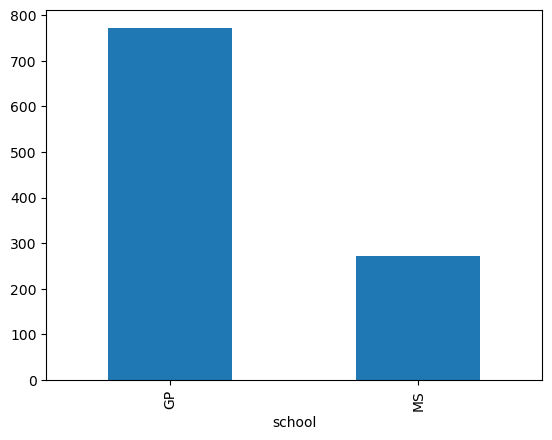

In [6]:
df.groupby("school")["age"].count().plot.bar()

<AxesSubplot:xlabel='sex'>

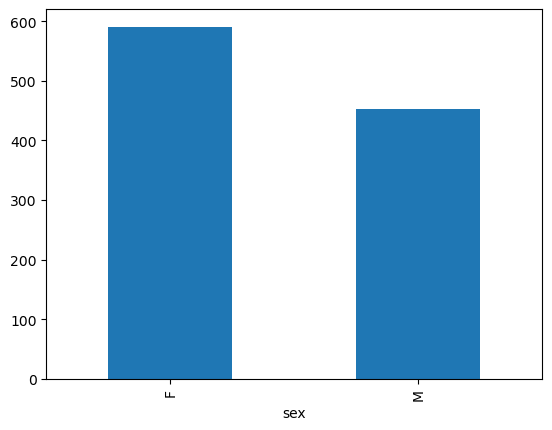

In [7]:
df.groupby("sex")["age"].count().plot.bar()

### 1.3
 Creare un nuovo attributo “GRate” che misuri per ogni studente la differenza tra la
valutazione ricevuta nel primo e nel secondo periodo

In [8]:
df["GRate"] = df["G1"] - df["G2"]
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,3,2,2,3,3,10,1,1,1,0
3,GP,F,15,U,1,T,4,2,health,services,...,2,2,1,1,5,2,2,1,2,1
4,GP,F,16,U,1,T,3,3,other,other,...,3,2,1,2,5,4,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,4,2,1,2,5,4,1,1,1,0
1040,MS,F,18,U,0,T,3,1,teacher,services,...,3,4,1,1,1,4,2,2,2,0
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,5,6,1,1,1,0
1042,MS,M,17,U,0,T,3,1,services,services,...,4,5,3,4,2,6,1,1,1,0


Realizzare un grafico che rappresenti per ogni età questa differenza

<AxesSubplot:xlabel='age'>

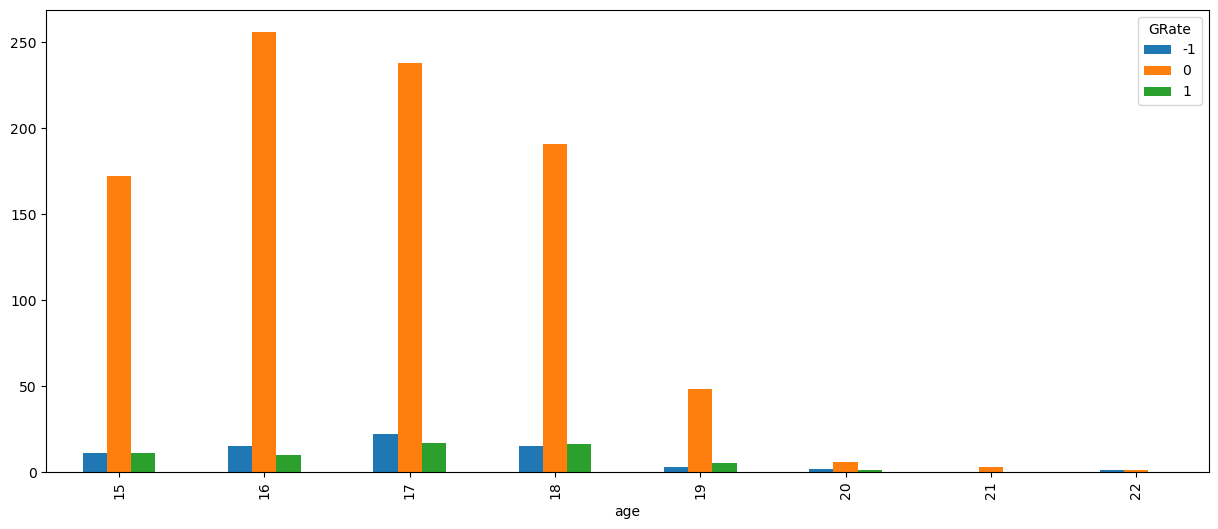

In [19]:
pd.pivot_table(df, 'sex', index='age', columns='GRate', aggfunc='count').plot(kind="bar",figsize=(15,6))